In [7]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
#tf.random.set_seed(seed_value)
# for later versions: 
tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
#session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
#sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
#K.set_session(sess)
# for later versions:
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [8]:

# python -m pip install SoundFile
import glob
import sys
from info import i, printb, printr, printp, print
import glob
import os
import librosa
import pdb
import csv
import json
import re
import numpy as np
import random
import librosa.display
import IPython.display as ipd
from sklearn import preprocessing
from collections import Counter
from matplotlib import pyplot as plt
from info import i, printb, printr, printp, print
import muda
import jams
from sklearn import svm
import librosa
import keras
import scipy.io as sio
import io
#-----------------------------------parameters for CNN -----------------------------------#
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential, Input, Model 
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D , MaxPooling2D
from keras.layers.normalization import BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.models import Model
from sklearn.metrics import accuracy_score 
import pandas as pd 
#-----------------------------------parameters for TTBOX -----------------------------------#
import timbre_descriptor as td
import numpy as np
import scipy as sc
import my_tools as mt
from collections import namedtuple
import scipy
import scipy.signal
from scipy.io import wavfile

import matplotlib
import swipep as swp             # used for sing le-F0 estimation
import warnings                 # used for warning removal
import time               # used performance benchmark
import librosa


from utils import get_list_samples_names, get_features_from_samples, write_Statelabels_from_beeNotBeelabels,raw_feature_fromSample, labels2binary , get_GT_labels_fromFiles, get_items2replicate, BalanceData_online, get_list_samples_name_MFCC, SVM_Classification_BeehiveSTATE , fit_and_evaluate,deep_model, plot_confusion_matrix, get_list_samples_name_TTBOX, Dense_Net, plot_accuracy_val_accuracy, read_HiveState_fromSampleName ,train_and_evaluate_model , cross_validation_4folds, get_list_samples_name_

In [9]:
#----------------------------------- parameters to change-----------------------------------#
block_size=1 # blocks of 1 second
thresholds=[0, 0.5]  # minimum length for nobee intervals: 0 or 5 seconds (creates one label file per threshold value)
path_audioFiles="C:\\Users\PC\python\Stage\To Bee or not to Bee_the annotated dataset"+os.sep  # path to audio files
annotations_path="C:\\Users\PC\python\Stage\To Bee or not to Bee_the annotated dataset"+os.sep # path to .lab files
path_save_audio_labels= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
#----------------------------------- parameters to change-----------------------------------#
path_workingFolder='C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
labels2read= 'state_labels'
feature = 'MFCCs20'
path_working_MFCCs20= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\MFCCs20_matrix.mat'+os.sep
path_working_TTBox= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\TTBox_matrix.mat'+os.sep
path_working_stft= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\stft_matrix.mat'+os.sep
path_working_cqt= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\cqt_matrix.mat'+os.sep


path_save_audio_MFCCs= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\MFCCs20_matrix.mat'+os.sep 
path_save_audio_ttbox= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\ttb_mat'+os.sep 
path_save_audio_stft= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\stft_matrix.mat'+os.sep 
path_save_audio_cqt= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\cqt_matrix.mat'+os.sep 

nbits = 16;
MAX_VAL = pow(2,(nbits-1)) * 1.0;
class_names= ['missing queen', 'active' ]
#----------------------------------parameter for CNN -----------------------------------------------------------#

#early_stopping= EarlyStopping(monitor='val_loss', patience=pat, verbose=1 )
n_folds=4
epochs=50
batch_size=145



#----------------------------------------------------------------------------------------------#
# if path doesn't exist then create one !!!
if not os.path.exists(path_save_audio_labels):
    os.makedirs(path_save_audio_labels) 

# MFCCs+ CNN

In [10]:
#https://www.kaggle.com/adarshchavakula/how-to-cross-validate-properly
#https://www.kaggle.com/sharifamit19/data-augmentation-cross-validation-ensemble

In [23]:
def save_confusion_matrix(cnf_matrix, filename, class_names):
    fig = plt.figure()
    # Plot non-normalized confusion matrix

    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title=filename)
    plt.savefig('confusion_matrix'+str(filename)+'.jpg')
    


In [12]:
# len(x_train), len(x_test), len(y_train), len(y_test)
#(13132, 4163, 13132, 4163, 13132)
def train_test_split_online(x_train, x_test, y_train, y_test):
      
    val1= (len(x_train)*0.3)/0.7
    rd= int(val1)+1
    print(val1)
    if len(x_test)> rd:
        #prct= (rd*100)/len(x_test)       
        x_test=x_test[0: int(rd)+1 ]
        y_test=y_test[0: int(rd)+1 ]
        #print("prct", prct)
        #x1, x_test, y1, y_test= train_test_split(x_test, y_test, test_size=prct/100 , shuffle=False)
    else: 
        val2= (len(x_test)* 0.7)/0.3
        rd1= int(val2)+1
        #prct=(rd1*100)/len(x_train)
        x_train= x_train[0: int(rd1)+1]
        y_train= y_train[0: int(rd1)+1]
        #print("prct2", prct)
        # x1, x_train, y1, y_train= train_test_split(x_train, y_train, test_size=prct/100 , shuffle=False)
    return x_train, x_test, y_train, y_test 
    

In [13]:
ruche1,Y1,labels1, sample_ids1, ruche2,Y2,labels2, sample_ids2, ruche3,Y3,labels3, sample_ids3, ruche4,Y4,labels4, sample_ids4=get_list_samples_name_('b',path_save_audio_MFCCs)

In [ ]:
model_history=[]
val_accuracy=[]

for i in range(4):
    fold= i+1
    print("Training on Fold :", i+1)

    x_train, x_test, y_train, y_test,sample_ids_train, sample_ids_test=cross_validation_4folds(i+1, ruche1,Y1, ruche2,Y2, ruche3,Y3, ruche4,Y4 , sample_ids1 , sample_ids2 , sample_ids3 , sample_ids4) 
    print(len(x_train), len(x_test), len(y_train), len(y_test))
   # x_train, x_test, y_train, y_test = train_test_split_online(x_train, x_test, y_train, y_test)
    #print(len(x_train), len(x_test), len(y_train), len(y_test))
    #y_train, x_train, sample_ids1_train= BalanceData_online(y_train, x_train, sample_ids_train)
    #y_test, x_test, sample_ids1_test= BalanceData_online(y_test, x_test, sample_ids_test)
    # Convert features and corresponding classification labels into numpy arrays
    X_train = np.array(x_train)
    y_train = np.array(y_train)
    X_test = np.array(x_test)
    y_test = np.array(y_test)
    print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)
    print("Reshape the data")
    x, y, z= X_train.shape
    X_train= X_train.reshape(-1, 20, 44, 1)
    Y_train=y_train.reshape(-1, 1)

    x, y, z= X_test.shape
    X_test= X_test.reshape(-1, 20, 44, 1)
    Y_test=y_test.reshape(-1, 1)
    print("Encode the classification labels")  
    X_train = np.array(X_train.tolist())
    Y_train = np.array(Y_train.tolist())
    X_test = np.array(X_test.tolist())
    Y_test = np.array(Y_test.tolist())
    # Encode the classification labels
    le = LabelEncoder()
    y_train = to_categorical(le.fit_transform(Y_train)) 
    y_test = to_categorical(le.fit_transform(Y_test))

    size= ( 20,44, 1)
    
    model_filename = "cnn_model_cpu_multifilter_fold{}.hdf5".format(fold)
    model=None
    model=deep_model(size)
    results, val_acc, report, confusion_matrix = train_and_evaluate_model(model, X_train, y_train, X_test, y_test,  Y_test ,epochs, batch_size, model_filename )
    model_history.append(results)
    val_accuracy.append(val_acc)
    df = pd.DataFrame(report).transpose()
    name="classification report for MFCC + CNN.csv "+str(fold)
    filename="confusion_matrix for MFCC + CNN "+str(fold)
    df.to_csv(name)
    save_confusion_matrix(confusion_matrix,filename, class_names )
    print("============="*12, end="\n\n\n")


In [15]:
for i in range(4):
    fold=i+1
    print("classification report for MFCC + CNN.csv "+str(fold))
    classi_report= pd.read_csv("classification report for MFCC + CNN.csv "+str(fold))
    print(classi_report)

[2020-05-29 01:21:19 RAM50.7% 0.66GB] classification report for MFCC + CNN.csv 1
[2020-05-29 01:21:19 RAM50.7% 0.66GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.000335  0.062500  0.000666    16.000000
1         active   0.979424  0.192973  0.322420  3700.000000
2       accuracy   0.192411  0.192411  0.192411     0.192411
3      macro avg   0.489879  0.127736  0.161543  3716.000000
4   weighted avg   0.975208  0.192411  0.321035  3716.000000
[2020-05-29 01:21:19 RAM50.7% 0.66GB] classification report for MFCC + CNN.csv 2
[2020-05-29 01:21:19 RAM50.7% 0.66GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.661793  0.846633  0.742888   802.000000
1         active   0.895497  0.752320  0.817688  1401.000000
2       accuracy   0.786655  0.786655  0.786655     0.786655
3      macro avg   0.778645  0.799477  0.780288  2203.000000
4   weighted avg   0.810417  0.786655  0.790457  2203.000000
[2020-05-29 01:21:19 RAM50.7% 

[2020-05-29 01:21:20 RAM50.7% 0.66GB] The best val_accuracy of the fold 1 is :  19.241119483315394
[2020-05-29 01:21:20 RAM50.7% 0.66GB] The best val_accuracy of the fold 2 is :  78.66545619609623
[2020-05-29 01:21:20 RAM50.7% 0.66GB] The best val_accuracy of the fold 3 is :  33.821763151573386
[2020-05-29 01:21:20 RAM50.7% 0.66GB] The best val_accuracy of the fold 4 is :  30.86094551504229


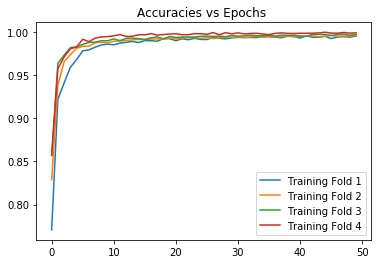

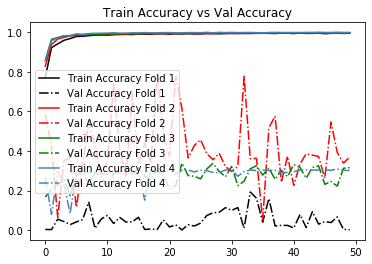

In [16]:
for i in range(len(val_accuracy)):
    fold=i+1
    print("The best val_accuracy of the fold "+str(fold)+" is : " ,val_accuracy[i]*100 )
    
plot_accuracy_val_accuracy(model_history)

# TTBOX+ CNN

In [17]:
ruche1,Y1,labels1, sample_ids1, ruche2,Y2,labels2, sample_ids2, ruche3,Y3,labels3, sample_ids3, ruche4,Y4,labels4, sample_ids4=get_list_samples_name_('ttb_vec', path_save_audio_ttbox)

In [ ]:
# save the model history in a list after fitting so we can plot later 
model_history=[]
val_accuracy=[]
for i in range(4):
    fold= i+1
    print("Training on Fold :", fold)
    x_train, x_test, y_train, y_test,sample_ids_train, sample_ids_test=cross_validation_4folds(fold, ruche1,Y1, ruche2,Y2, ruche3,Y3, ruche4,Y4 , sample_ids1 , sample_ids2 , sample_ids3 , sample_ids4) 
    print(len(x_train), len(x_test), len(y_train), len(y_test))
    #x_train, x_test, y_train, y_test = train_test_split_online(x_train, x_test, y_train, y_test)
    # y_train, x_train, sample_ids1_train= BalanceData_online(y_train, x_train, sample_ids_train)
    #y_test, x_test, sample_ids1_test= BalanceData_online(y_test, x_test, sample_ids_test)
    # Convert features and corresponding classification labels into numpy arrays
    X_train = np.array(x_train)
    y_train = np.array(y_train)
    X_test = np.array(x_test)
    y_test = np.array(y_test)
    print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)
    print("Reshape the data")
    x, y, z= X_train.shape
    X_train= X_train.reshape(-1, 164, 1)
    Y_train=y_train.reshape(-1, 1)

    x, y, z= X_test.shape
    X_test= X_test.reshape(-1, 164, 1)
    Y_test=y_test.reshape(-1, 1)
    print("Encode the classification labels")  
    X_train = np.array(X_train.tolist())
    y_train = np.array(y_train.tolist())
    X_test = np.array(X_test.tolist())
    y_test = np.array(y_test.tolist())
    # Encode the classification labels
    le = LabelEncoder()
    y_train = to_categorical(le.fit_transform(y_train)) 
    y_test = to_categorical(le.fit_transform(y_test))
    
    size=(164, 1)
    model_filename = "DDN_model_cpu_multifilter_fold{}.hdf5".format(fold)
    model=None
    model=Dense_Net(size)
    #results=train_and_evaluate_model(model, X_train, y_train, X_test, y_test,  Y_test ,epochs, batch_size, model_filename ) 
    #model_history.append(train_and_evaluate_model(model, X_train, y_train, X_test, y_test,  Y_test ,epochs, batch_size, model_filename ))
    results, val_acc, report, confusion_matrix = train_and_evaluate_model(model, X_train, y_train, X_test, y_test,  Y_test ,epochs, batch_size, model_filename )
    model_history.append(results)
    val_accuracy.append(val_acc)
    df = pd.DataFrame(report).transpose()
    name="classification report for TTBOX + DDN.csv "+str(fold)
    filename="confusion_matrix for TTBOX+DDN "+str(fold)
    df.to_csv(name)
    save_confusion_matrix(confusion_matrix,filename, class_names )
    print("============="*12, end="\n\n\n")



In [19]:
for i in range(4):
    fold=i+1
    print("classification report for TTBOX + DDN for fold "+str(fold))
    classi_report= pd.read_csv("classification report for TTBOX + DDN.csv "+str(fold))
    print(classi_report)


[2020-05-29 01:25:52 RAM49.7% 0.61GB] classification report for TTBOX + DDN for fold 1
[2020-05-29 01:25:52 RAM49.7% 0.61GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.000367  0.062500  0.000730    16.000000
1         active   0.984879  0.264054  0.416454  3700.000000
2       accuracy   0.263186  0.263186  0.263186     0.263186
3      macro avg   0.492623  0.163277  0.208592  3716.000000
4   weighted avg   0.980640  0.263186  0.414664  3716.000000
[2020-05-29 01:25:52 RAM49.7% 0.61GB] classification report for TTBOX + DDN for fold 2
[2020-05-29 01:25:52 RAM49.7% 0.61GB]       Unnamed: 0  precision    recall  f1-score      support
0  missing_queen   0.911628  0.977556  0.943442   802.000000
1         active   0.986597  0.945753  0.965743  1401.000000
2       accuracy   0.957331  0.957331  0.957331     0.957331
3      macro avg   0.949113  0.961655  0.954593  2203.000000
4   weighted avg   0.959305  0.957331  0.957624  2203.000000
[2020-05-29 01:25:

[2020-05-29 01:25:52 RAM49.8% 0.61GB] The best val_accuracy of the fold 1 is :  0.26318622174381057
[2020-05-29 01:25:52 RAM49.8% 0.61GB] The best val_accuracy of the fold 2 is :  0.9573309123921925
[2020-05-29 01:25:52 RAM49.8% 0.61GB] The best val_accuracy of the fold 3 is :  0.425414364640884
[2020-05-29 01:25:52 RAM49.8% 0.61GB] The best val_accuracy of the fold 4 is :  0.3348121447386663


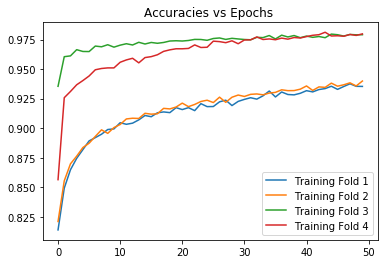

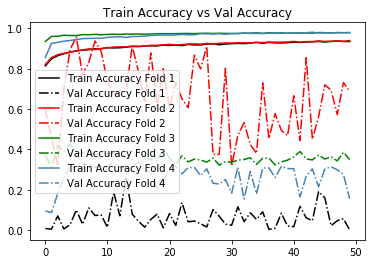

In [20]:
for i in range(len(val_accuracy)):
    fold=i+1
    print("The best val_accuracy of the fold "+str(fold)+" is : " ,val_accuracy[i])
    
plot_accuracy_val_accuracy(model_history)
liste= [0.26318622174381057, ]


# STFT +CNN

In [24]:
ruche1,Y1,labels1, sample_ids1, ruche2,Y2,labels2, sample_ids2, ruche3,Y3,labels3, sample_ids3, ruche4,Y4,labels4, sample_ids4=get_list_samples_name_('b', path_save_audio_stft)


In [25]:
from sklearn.preprocessing import  StandardScaler
# save the model history in a list after fitting so we can plot later 
model_history=[]
val_accuracy=[]
for i in range(4):
    fold= i+1
    print("Training on Fold :", fold)
    x_train, x_test, y_train, y_test,sample_ids_train, sample_ids_test=cross_validation_4folds(fold, ruche1,Y1, ruche2,Y2, ruche3,Y3, ruche4,Y4 , sample_ids1 , sample_ids2 , sample_ids3 , sample_ids4) 
    print(len(x_train), len(x_test), len(y_train), len(y_test))
    #x_train, x_test, y_train, y_test = train_test_split_online(x_train, x_test, y_train, y_test)
    # y_train, x_train, sample_ids1_train= BalanceData_online(y_train, x_train, sample_ids_train)
    #y_test, x_test, sample_ids1_test= BalanceData_online(y_test, x_test, sample_ids_test)
    # Convert features and corresponding classification labels into numpy arrays
    X_train_abs = np.abs(x_train)
    X_test_abs = np.abs(x_test)
    print("tolist()")
    X_train = np.array(X_train_abs)
    y_train = np.array(y_train)
    X_test = np.array(X_test_abs)
    y_test = np.array(y_test)
    print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)
    print("Reshape the data")
    
    x, y, z= X_train.shape
    X_train= X_train.reshape(-1, 1025, 44, 1)
    Y_train=y_train.reshape(-1, 1)

    x, y, z= X_test.shape
    X_test= X_test.reshape(-1,  1025, 44, 1)
    Y_test=y_test.reshape(-1, 1)
    
  
    print("labelencoder")
    # Encode the classification labels
    le = LabelEncoder()
    y_train = to_categorical(le.fit_transform(y_train)) 
    y_test = to_categorical(le.fit_transform(y_test))
    
    
    size=( 1025,44, 1)
    model_filename = "stft_cnn_model_cpu_multifilter_fold{}.hdf5".format(fold)
    model=None
    model=deep_model(size)
    results, val_acc, report = train_and_evaluate_model(model, X_train, y_train, X_test, y_test,  Y_test ,epochs, batch_size, model_filename )
    model_history.append(results)
    val_accuracy.append(val_acc)
    df = pd.DataFrame(report).transpose()
    name="classification report for stft + CNN.csv "+str(fold)
    filename="confusion_matrix for stft + CNN "+str(fold)
    df.to_csv(name)
    save_confusion_matrix(confusion_matrix,filename )
    print("============="*12, end="\n\n\n")


[2020-05-29 01:27:50 RAM93.2% 4.56GB] Training on Fold : 1
[2020-05-29 01:27:50 RAM93.2% 4.56GB] fold==1
[2020-05-29 01:27:52 RAM89.7% 4.59GB] 13579 3716 13579 3716
[2020-05-29 01:29:46 RAM70.2% 4.05GB] tolist()
[2020-05-29 01:29:56 RAM94.0% 1.16GB] (13579,) (13579, 1025, 44) (3716,) (3716, 1025, 44)
[2020-05-29 01:29:57 RAM93.3% 1.17GB] Reshape the data
[2020-05-29 01:29:57 RAM93.0% 1.17GB] labelencoder
[2020-05-29 01:30:03 RAM84.4% 1.21GB] Train...


C:\Users\PC\python\Stage\Audio_based_ V2\utils.py:665: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  results= model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, callbacks=[stopping, checkpointer], verbose=2 , validation_data=(X_test, Y_test))


Train on 13579 samples, validate on 3716 samples
Epoch 1/50
 - 559s - loss: 0.4311 - accuracy: 0.8002 - val_loss: 1.8409 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to stft_cnn_model_cpu_multifilter_fold1.hdf5
Epoch 2/50
 - 540s - loss: 0.2630 - accuracy: 0.8935 - val_loss: 1.5269 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/50
 - 543s - loss: 0.1291 - accuracy: 0.9514 - val_loss: 5.6885 - val_accuracy: 5.3821e-04

Epoch 00003: val_accuracy improved from 0.00000 to 0.00054, saving model to stft_cnn_model_cpu_multifilter_fold1.hdf5
Epoch 4/50
 - 544s - loss: 0.0863 - accuracy: 0.9711 - val_loss: 8.8663 - val_accuracy: 0.0013

Epoch 00004: val_accuracy improved from 0.00054 to 0.00135, saving model to stft_cnn_model_cpu_multifilter_fold1.hdf5
Epoch 5/50
 - 543s - loss: 0.0426 - accuracy: 0.9859 - val_loss: 11.0618 - val_accuracy: 5.3821e-04

Epoch 00005: val_accuracy did not improve from 0

KeyboardInterrupt: 

In [ ]:
for i in range(4):
    fold=i+1
    print("classification report for stft+ CNN for fold "+str(fold))
    classi_report= pd.read_csv("classification report for TTBOX + DDN.csv "+str(fold))
    print(classi_report)


In [ ]:
for i in range(len(val_accuracy)):
    fold=i+1
    print("The best val_accuracy of the fold "+str(fold)+" is : " ,val_accuracy[i])
    
plot_accuracy_val_accuracy(model_history)

# CQT + CNN